# Pandas

Pandas are well suited for tabular data with heterogeneously typed columns, as in an
SQL table or Excel spreadsheet

# Data Structures

Pandas introduces two new data structures to Python – Series and DataFrame, both of
which are built on top of NumPy (this means it’s fast).

# Series

This is a one-dimensional object similar to column in a spreadsheet or SQL table. By
default each item will be assigned an index label from 0 to N

In [6]:
#Creating a pandas series

import pandas as pd
import numpy as np

s = pd.Series([1,2,3,np.nan,5,6], index=['A','B','C','D','E','F'])
print(s)

A    1.0
B    2.0
C    3.0
D    NaN
E    5.0
F    6.0
dtype: float64


# DataFrame

It is a two-dimensional object similar to a spreadsheet or an SQL table. This is the most
commonly used pandas object.

In [7]:
#Creating a pandas dataframe

data = {'Gender': ['F', 'M', 'M'],'Emp_ID': ['E01', 'E02',
'E03'], 'Age': [25, 27, 25]}
df = pd.DataFrame(data, columns=['Emp_ID','Gender', 'Age'])
df

,Emp_ID,Gender,Age
0,E01,F,25
1,E02,M,27
2,E03,M,25


# Reading and Writing Data

Listing 2-19. Reading / writing data from csv, text, Excel
# Reading
df=pd.read_csv('Data/mtcars.csv') # from csv
df=pd.read_csv('Data/mtcars.txt', sep='\t') # from text file
df=pd.read_excel('Data/mtcars.xlsx','Sheet2') # from Excel
# reading from multiple sheets of same Excel into different dataframes
xlsx = pd.ExcelFile('file_name.xls')
sheet1_df = pd.read_excel(xlsx, 'Sheet1')
sheet2_df = pd.read_excel(xlsx, 'Sheet2')
# writing
# index = False parameter will not write the index values, default is True
df.to_csv('Data/mtcars_new.csv', index=False)
df.to_csv('Data/mtcars_new.txt', sep='\t', index=False)
df.to_excel('Data/mtcars_new.xlsx',sheet_name='Sheet1', index = False)


# basic statistical summary methods

describe()- will returns the quick stats such as count, mean, std (standard
deviation), min, first quartile, median, third quartile, max on each column
of the dataframe

df = pd.read_csv('Data/iris.csv')
df.describe()
#---- output ----
#Sepal.Length Sepal.Width Petal.Length Petal.Width
#count 150.000000 150.000000 150.000000 150.000000
#mean 5.843333 3.057333 3.758000 1.199333
#std 0.828066 0.435866 1.765298 0.762238
#min 4.300000 2.000000 1.000000 0.100000
#25% 5.100000 2.800000 1.600000 0.300000
#50% 5.800000 3.000000 4.350000 1.300000
#75% 6.400000 3.300000 5.100000 1.800000
#max 7.900000 4.400000 6.900000 2.500000

# Handling Categorical Data

# Create dummy variable

In [26]:
import pandas as pd
#from patsy import dmatrices
df = pd.DataFrame({'A': ['high', 'medium', 'low'],
'B': [10,20,30]},
index=[0, 1, 2])


In [27]:
df

,A,B
0,high,10
1,medium,20
2,low,30


In [28]:
df_with_dummies= pd.get_dummies(df, prefix='A', columns=['A'])

In [29]:
df_with_dummies

,B,A_high,A_low,A_medium
0,10,1,0,0
1,20,0,0,1
2,30,0,1,0


# Convert to number

In [36]:
#Listing 3-2. Converting categorical variable to numerics
import pandas as pd
# using pandas package's factorize function
#df['A_pd_factorized'] = pd.factorize(df['A'])[0]
# Alternatively you can use sklearn package's LabelEncoder function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['A_LabelEncoded'] = le.fit_transform(df.A)
print(df)

        A   B  A_pd_factorized  A_LabelEncoded
0    high  10                0               0
1  medium  20                1               2
2     low  30                2               1


# Normalization and scaling

In [37]:
from sklearn import datasets
import numpy as np
from sklearn import preprocessing

In [38]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [39]:
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

In [40]:
minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

In [41]:
print('Mean before standardization: petal length={:.1f}, petal width={:.1f}'
.format(X[:,0].mean(), X[:,1].mean()))
print('SD before standardization: petal length={:.1f}, petal width={:.1f}'
.format(X[:,0].std(), X[:,1].std()))
print('Mean after standardization: petal length={:.1f}, petal width={:.1f}'
.format(X_std[:,0].mean(), X_std[:,1].mean()))
print('SD after standardization: petal length={:.1f}, petal width={:.1f}'
.format(X_std[:,0].std(), X_std[:,1].std()))

Mean before standardization: petal length=3.8, petal width=1.2
SD before standardization: petal length=1.8, petal width=0.8
Mean after standardization: petal length=-0.0, petal width=-0.0
SD after standardization: petal length=1.0, petal width=1.0


In [43]:
print('\nMin value before min-max scaling: patel length={:.1f}, patelwidth={:.1f}'
.format(X[:,0].min(), X[:,1].min()))
print('Max value before min-max scaling: petal length={:.1f}, petalwidth={:.1f}'
.format(X[:,0].max(), X[:,1].max()))
print('Min value after min-max scaling: patel length={:.1f}, patelwidth={:.1f}'
.format(X_minmax[:,0].min(), X_minmax[:,1].min()))
print('Max value after min-max scaling: petal length={:.1f}, petalwidth={:.1f}'
.format(X_minmax[:,0].max(), X_minmax[:,1].max()))


Min value before min-max scaling: patel length=1.0, patelwidth=0.1
Max value before min-max scaling: petal length=6.9, petalwidth=2.5
Min value after min-max scaling: patel length=0.0, patelwidth=0.0
Max value after min-max scaling: petal length=1.0, petalwidth=1.0


# Exploratory Data Analysis (EDA)

EDA is all about understanding your data by employing summarizing and visualizing
techniques. At a high level the EDA can be performed in two folds, that is, univariate
analysis and multivariate analysis.

# Univariate Analysis

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['species'])

In [5]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.
species==1.0,'versicolor', 'virginica'))

In [7]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
print (iris['species'].value_counts())

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64


Pandas supports plotting functions to quick visualization on attributes. We can see
from the plot that 'species' has 3 category with 50 records each.

# Pandas dataframe visualization

Text(0.5, 0.98, 'Histogram')

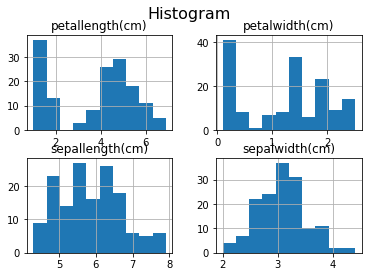

In [16]:
iris.hist() # plot histogram
plt.suptitle("Histogram", fontsize=16) # use suptitle to add title to all

In [18]:
plt.show()

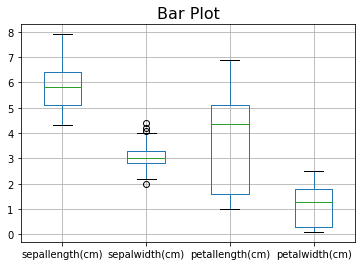

In [19]:
iris.boxplot() # plot boxplot
plt.title("Bar Plot", fontsize=16)
plt.show()